## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

This project was performed to help a company decide if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability


In [329]:
#importing the libraries needed

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [330]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [332]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [333]:
df.converted.mean()

0.11965919355605512

In [334]:
#The proportion of users converted.
35173/(35173+256275)

0.1206836210919272

e. The number of times the `new_page` and `treatment` don't line up.

In [335]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [336]:
#when they do match
df[df['group']=='treatment'][df['landing_page']=='new_page'].shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(145311, 5)

In [337]:
#when we have treatment and old_page
df[df['group']=='treatment'][df['landing_page']=='old_page'].shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(1965, 5)

In [338]:
#when we have control and new_page
df[df['group']=='control'][df['landing_page']=='new_page'].shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(1928, 5)

In [339]:
#when we have control and old_page
df[df['group']=='control'][df['landing_page']=='old_page'].shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(145274, 5)

In [340]:
#adding the two mis-match cases
1965+1928

3893

f. Do any of the rows have missing values?

In [341]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [342]:
df.isna().any().sum()

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

# DROP DUPLICATES AFTER GETTING NEW DF

In [343]:
#when they do match---- ie treatment and new_page
df_1 = df[df['group']=='treatment'][df['landing_page']=='new_page']
df_1 = df_1.reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [344]:
#when they do match--- ie control and old_page

df_2 = df[df['group']=='control'][df['landing_page']=='old_page'];
df_2 = df_2.reset_index(drop=True);

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [345]:
df_2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0


## Combining the two dataframes to form df2

In [346]:
df2 = df_1.append(df_2,ignore_index=True)


In [347]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [348]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [349]:
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [350]:
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [351]:
#removing one of the duplicate user
df2.drop(labels=None,axis=0,index=1404,columns=None,level=None,inplace=True,errors='raise')



In [352]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [353]:
df2.converted.value_counts()

0    255831
1     34753
Name: converted, dtype: int64

In [354]:
#the probability of an individual converting regardless of the page they receive
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [355]:
#Probabilty of converted being that an individual is in the control group
df2.query('group == "control"')['converted'].mean()


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [356]:
#Probabilty of converted being that an individual is in the treatment group
df2.query('group=="treatment"')['converted'].mean()


0.11880806551510564

d. What is the probability that an individual received the new page?

In [357]:
df2.landing_page.value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [358]:
new_page_count = df2.landing_page.value_counts()[0]
old_page_count = df2.landing_page.value_counts()[1]

#the probability that an individual received the new page

new_page_count/(new_page_count+old_page_count)

0.5000619442226688

In [359]:
obs_diff = df2.query('group=="treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
obs_diff

-0.0015782389853555567

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.


I dont think there is sufficient evidence to conclude that the new treatment page leads to more conversions. The probability or likelihood of conversions does not seem to be entirely due to new page since the chances are almost the same of receiving either a new or old page. Also, the converted rate for the treatment page is approximately 11.88% which is slightly lower than the converted rate for control 12.038%


However, if we allow the experiment to run longer, it might result in the higher converted rates for the treatment page 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**

$H_{0}$: $p_{old}$ $\geq$ $p_{new}$


$H_{1}$: $p_{old}$ $\lt$ $p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [360]:
df.converted.value_counts()
conv_rate = 35237/(35237+259241)
conv_rate

0.11965919355605512

a. What is the **convert rate** for $p_{new}$ under the null? 

In [361]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [362]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [363]:
n_𝑛𝑒𝑤 = df2.query('group == "treatment"')['user_id'].nunique()
n_𝑛𝑒𝑤

145310

d. What is $n_{old}$?

In [364]:
n_old=df2.query('group == "control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [365]:
new_page_converted = np.random.choice([0,1],size=n_𝑛𝑒𝑤,p=[(1-p_new),p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [366]:
old_page_converted = np.random.choice([0,1],size=n_old,p=[(1-p_old),p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [367]:
p_new_converted = new_page_converted.mean()
p_new_converted

0.11977840478975982

In [368]:
p_old_converted = old_page_converted.mean()
p_old_converted

0.11879620579043738

In [369]:
#finding the  𝑝𝑛𝑒𝑤_converted  -  𝑝𝑜𝑙𝑑_converted

p_new_converted - p_old_converted



0.000982198999322434

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [370]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)

In [371]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

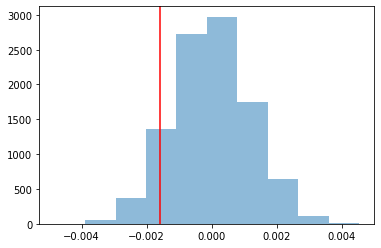

In [372]:
plt.hist(p_diffs,alpha = 0.5);
plt.axvline(obs_diff, color='r');

In [373]:
np.std(p_diffs)

0.0011870014221963107

In [374]:
null_vals = np.random.normal(0, np.std(p_diffs), 10000)
# Here are 10000 draws from the sampling distribution under the null

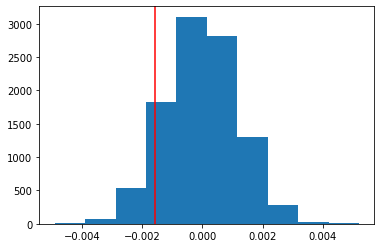

In [375]:
plt.hist(null_vals); 
plt.axvline(obs_diff, color='r');
#Here is the sampling distribution of the difference under the null

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [376]:
obs_diff

-0.0015782389853555567

In [377]:

(p_diffs > obs_diff).mean()

0.9104

In [378]:
(null_vals > obs_diff).mean()

0.9008

# If the P-value is small, choose H1. If large p-value, choose H0. 

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer.**

This value is known as the p-value in scientific studies. Since the value is high ie 0.9068, we fail to reject the null hypothesis $H_{0}$. and the alternative is not statistically significant.

This might imply that the new treatment page does just as well as the old page, and not even better when considering the conversion rates

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [379]:
import statsmodels.api as sm

convert_old =  df2.query('group == "control"')['converted'].value_counts()[1]
convert_new = df2.query('group == "treatment"')['converted'].value_counts()[1]
n_old = 145274
n_new = 145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [380]:
z_test , p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')



In [381]:
z_test

1.3109241984234394

In [382]:
p_value

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**answer.**

The null and alternate hypothesis for this method is given below which is a two-tailed hypothesis

$H_{0}$: $p_{old}$ = $p_{new}$


$H_{1}$: $p_{old}$ $\neq$ $p_{new}$


The p-value of 0.905  and z_score shows that the observed difference between the population and the sample is not statistically significant when we assume a significance factor of 0.05. Thus we fail to reject the null hypothesis




<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [383]:
df2['intercept']=1

In [384]:
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])

In [385]:
#duplicate the group column and renaming it as ab_page
df2['ab_page'] = df2['group']

In [386]:
#setting ab_page as 'treatment' = 1 and 'control' = 0
df2.loc[df2['ab_page'] == 'treatment', 'ab_page'] = 1
df2.loc[df2['ab_page'] == 'control', 'ab_page'] = 0

In [387]:
df2.tail()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0,1,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,1,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,1,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,1,0
290584,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [388]:
logistic_model1 = sm.Logit(df2['converted'], df2[['intercept', 'new_page']])
results = logistic_model1.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        15:05:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
new_page      -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [389]:
# type(df2[['ab_page']])
type(df2[['new_page']])

pandas.core.frame.DataFrame

In [390]:
logistic_model1 = sm.Logit(df2['converted'].astype(float), df2[['intercept', 'ab_page']].astype(float))
results = logistic_model1.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        15:05:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [391]:
np.exp(-0.0150), 1/np.exp(-0.0150)

(0.9851119396030626, 1.015113064615719)

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**answer.**


The p_value for part II is a one-tailed test while p_value for the logistic regression is two tailed test. The  p_value gotten for part II is 0.9068, while that for ab_page is 2 * (1-p_value) = 2*(1-0.9068) = 0.1864 

Both calculatd p_values do not show statistical significance in favour of the alternate hypothesis H_1.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

Its a good idea to consider other factors that might influence individuals convesion rate. By observing how the response variable is affected by a combined explanatory variables fitted into the model might give new insights into our results.

A disadvantage could be issue with multicollinearity betwwen the explanatory variables.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [392]:
country_df = pd.read_csv('./countries.csv')
df_new = country_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [393]:
### Create the necessary dummy variables


df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [394]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [395]:
logistic_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'CA']])
results = logistic_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:               1.521e-05
Time:                        15:05:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
==============================================================================
"""

In [396]:
US, CA = np.exp(-0.0099), np.exp(-0.0507)
US, CA

(0.9901488436829572, 0.9505637969004034)

The conversion rate for US is 99.01% while the conversion rate for CA is 95.05%. 

The p_values for CA is 0.074 and that of the US is 0.456 both do not show statistical significance for the alternative hypothesis, which might imply that the countries do not have significant impact on conversion rates.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [397]:
### Fit Your Linear Model And Obtain the Results

In [398]:
df_new['ab_page_us'] = df_new['US']*df_new['ab_page']
df_new['ab_page_ca'] = df_new['CA']*df_new['ab_page']

In [399]:
logit_model = sm.Logit(df_new['converted'].astype(float), df_new[['intercept', 'ab_page', 'US', 'CA', 'ab_page_us', 'ab_page_ca']].astype(float))
results = logit_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:               3.482e-05
Time:                        15:05:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
US             0.0057      0.019      0.306      0.760      -0.031       0.043
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
ab_page_us    -0.0314      0.027     -1.181      0.238      -0.084       0.021
ab_page_ca    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==============================================================================
"""

In conclusion, the p_values obtained for the ab_page, CA, US do not show statistical significance therefore, do not significantly affect conversion. The p_values are listed below

ab_page =0.190
US = 0.456
CA = 0.074

The impact of countries and ab_page does not seem to be statistically significant when the p_values are considered.
Longer duration for the experiment may lead to different conclusions drawn.